In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('../data/data.csv',  encoding = "ISO-8859-1")

In [121]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [248]:
df['Country'].unique()

array(['India', 'United States', 'Japan', 'Russia', 'South Korea',
       'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba',
       'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia',
       'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
       'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
       'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy',
       'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia',
       'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt',
       'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland',
       'Samoa'], dtype=object)

In [247]:
df.columns

TypeError: 'Index' object is not callable

In [123]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [124]:
# Summary statistics
print(df.describe())

            rank   subscribers   video views        uploads  video_views_rank  \
count  995.00000  9.950000e+02  9.950000e+02     995.000000      9.940000e+02   
mean   498.00000  2.298241e+07  1.103954e+10    9187.125628      5.542489e+05   
std    287.37606  1.752611e+07  1.411084e+10   34151.352254      1.362782e+06   
min      1.00000  1.230000e+07  0.000000e+00       0.000000      1.000000e+00   
25%    249.50000  1.450000e+07  4.288145e+09     194.500000      3.230000e+02   
50%    498.00000  1.770000e+07  7.760820e+09     729.000000      9.155000e+02   
75%    746.50000  2.460000e+07  1.355470e+10    2667.500000      3.584500e+03   
max    995.00000  2.450000e+08  2.280000e+11  301308.000000      4.057944e+06   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count    879.000000         962.000000                      9.390000e+02   
mean     386.053470         745.719335                      1.756103e+08   
std     1232.244746        1944.386561    

In [125]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

#### Quite a few missing values are present in the dataset. We will have to handle the missing values.

In [126]:
#Handling missing values in category column


#Since we cannot impute the missing value for categories we will assign the value other for the categories that has missing values
df['category'] = df['category'].fillna('Other') 

#Similarly channel type also will be filled with value 'Other' for missing values
df['channel_type'] = df['channel_type'].fillna('Other')


In [127]:
# Since there are only 5 values for dates so we will drop the rows with the null values
df.dropna(subset=['created_date'], inplace=True)

##### Handle the missing values in other categorical columns

In [128]:
#Get the list of categorical columns
category = []
for cat in df:
    if df[cat].dtype == 'O':
        category.append(cat)
category

['Youtuber',
 'category',
 'Title',
 'Country',
 'Abbreviation',
 'channel_type',
 'created_month']

In [129]:
categorical = df[category].dropna() #drop the rows with null values in categorical dataframe
df= pd.merge(df, categorical) #merge categorical dataframe into original dataframe

In [130]:
#Since the columns 'subscribers_for_last_30_days' and 'video_views_for_the_last_30_days'
# has large missing values and the column do not add that much for analysis and modeling so we will drop those columns

cols_to_drop= ['subscribers_for_last_30_days', 'video_views_for_the_last_30_days']
df.drop(cols_to_drop, axis=1, inplace=True)


In [131]:
df.shape

(870, 26)

In [132]:
df.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          7
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
created_year                               0
created_month                              0
created_date                               0
Gross tertiary education enrollment (%)    1
Population                                 1
Unemployme

##### Since most of the missing values are handled now we can move to the analysis

### **EDA**

Top 10 channels by subscribers

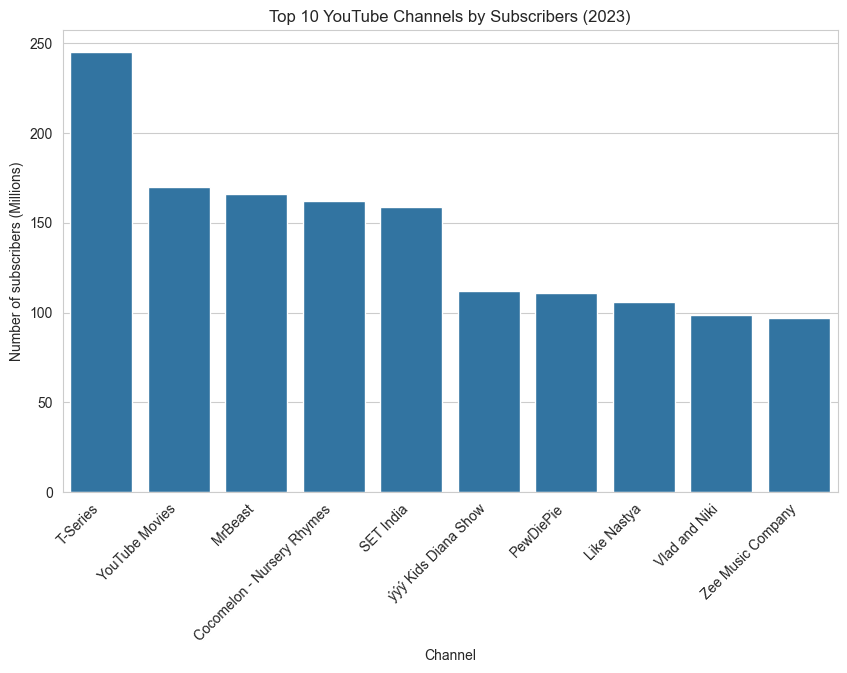

In [133]:
top10_sub = df.sort_values('subscribers', ascending=False).head(10)
top10_sub['subscribers'] = top10_sub['subscribers'] / 10**6
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_sub, x='Youtuber', y='subscribers')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by Subscribers (2023)')
plt.xlabel('Channel')
plt.ylabel('Number of subscribers (Millions)')
plt.show()

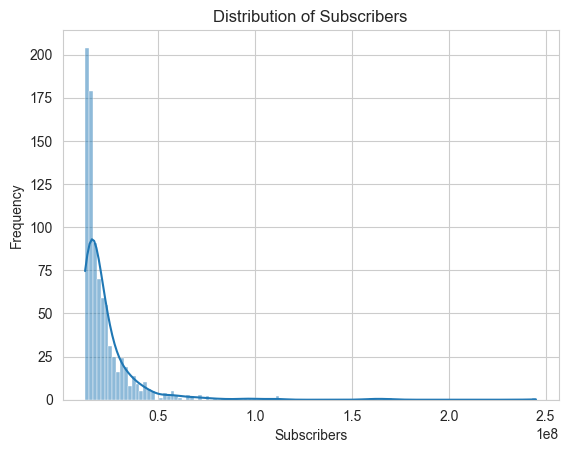

In [134]:
#Distribution of Subscriber
sns.histplot(df['subscribers'], kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()


### Subscriber vs Video Views

Text(0.5, 1.0, 'Relationship Between Subscribers and Video Views')

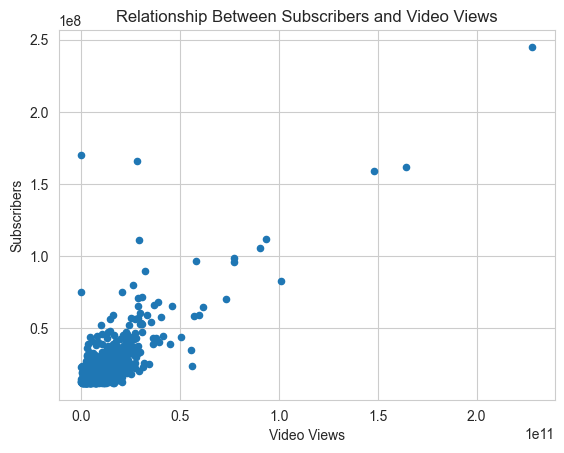

In [135]:
df.plot.scatter(x='video views', y='subscribers')
plt.xlabel('Video Views')
plt.ylabel('Subscribers')
plt.title('Relationship Between Subscribers and Video Views')

It has positive correlation

##### Video Views vs Highest Monthly Earninigs


Text(0.5, 1.0, 'Relationship Between Video Views and Highest Monthly Earnings')

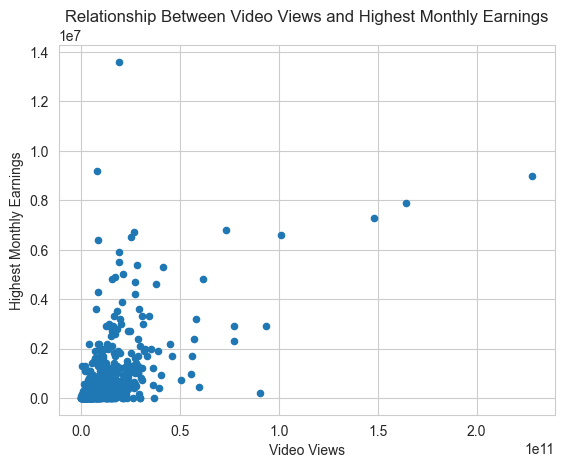

In [136]:
df.plot.scatter(x='video views', y='highest_monthly_earnings')
plt.xlabel('Video Views')
plt.ylabel('Highest Monthly Earnings')
plt.title('Relationship Between Video Views and Highest Monthly Earnings')

The correlation is not so strong

##### Count of youtube channels by categories

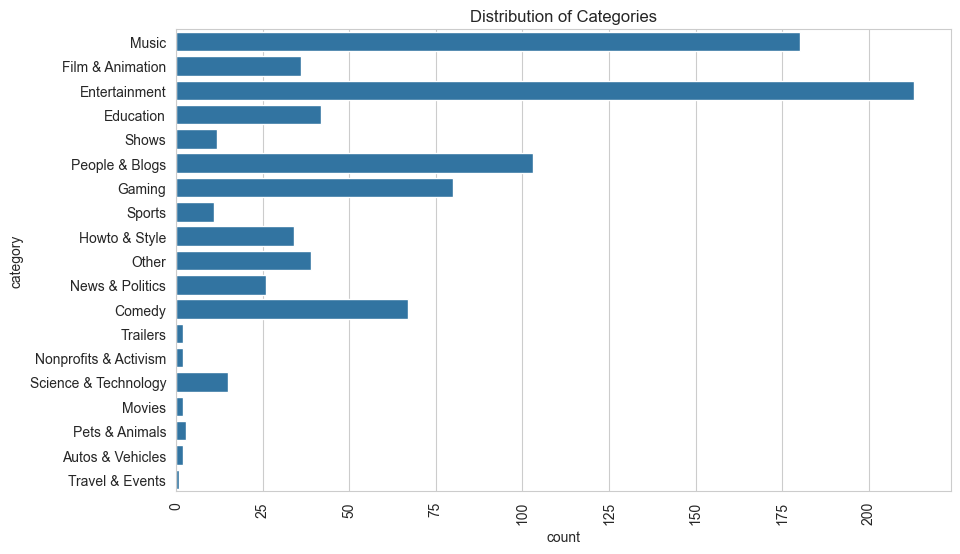

In [137]:

plt.figure(figsize=(10, 6))
sns.countplot(df['category'])
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

### Categories with the highest number of subscribers

Text(0.5, 1.0, 'Highest Subscribers by Category')

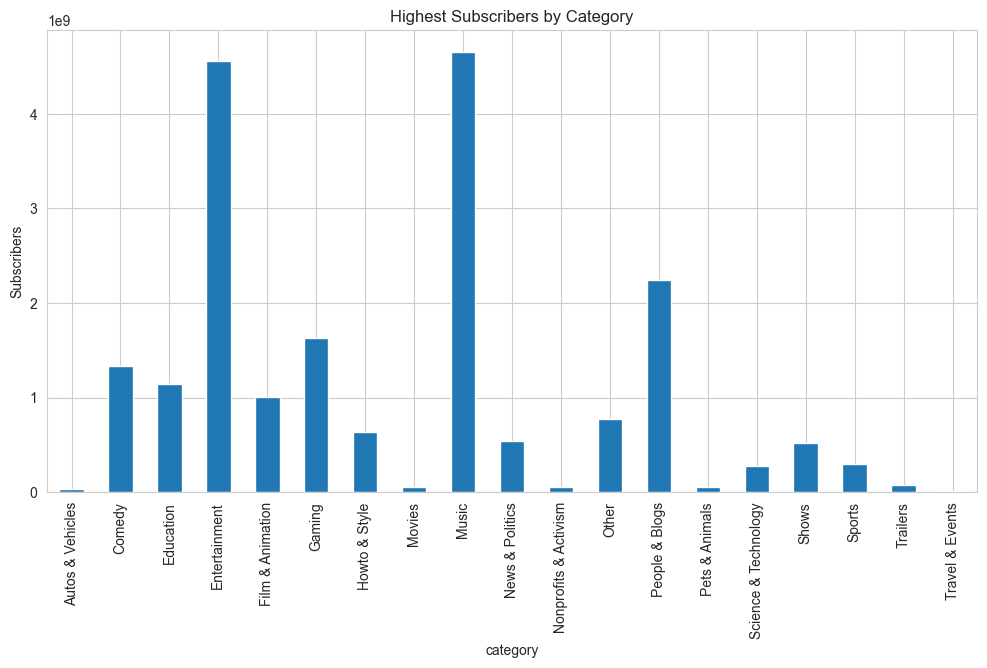

In [138]:
plt.figure(figsize=(12, 6))
category_with_highest_subscribers = df.groupby(['category'])['subscribers'].sum()
category_with_highest_subscribers.plot.bar()
plt.xlabel('category')
plt.ylabel('Subscribers')
plt.title('Highest Subscribers by Category')

#####  Youtube Channels with highest subscriber group by country

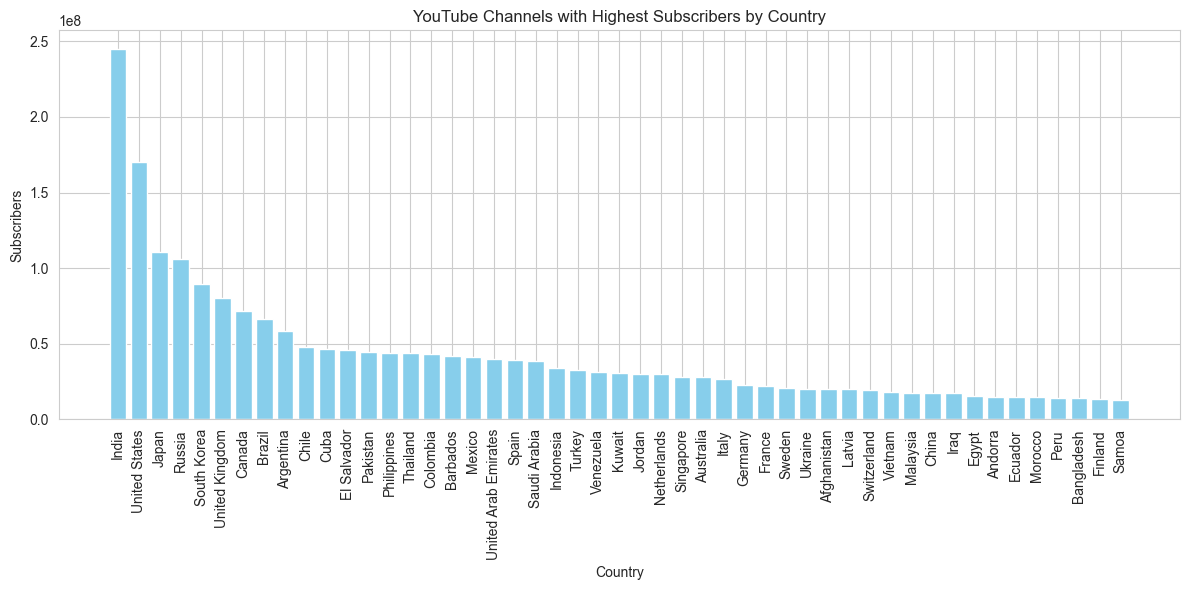

In [139]:

top_subscribers_by_country = df.groupby('Country')['subscribers'].idxmax()
top_subscribers_data = df.loc[top_subscribers_by_country, ['Country', 'Youtuber', 'subscribers']]

top_subscribers_data = top_subscribers_data.sort_values(by='subscribers', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(top_subscribers_data['Country'], top_subscribers_data['subscribers'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Subscribers')
plt.title('YouTube Channels with Highest Subscribers by Country')
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

##### Top 10 countries with highest number of channel

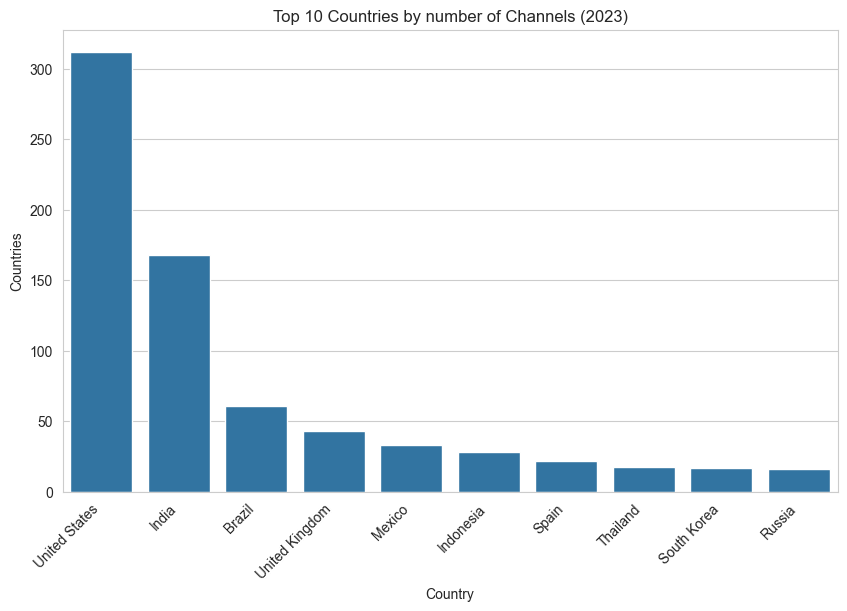

In [140]:
top10_country = df.value_counts('Country').to_frame().reset_index().head(10)
top10_country
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_country, x='Country', y='count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by number of Channels (2023)')
plt.xlabel('Country')
plt.ylabel('Countries')
plt.show()

Top 10 channels by views

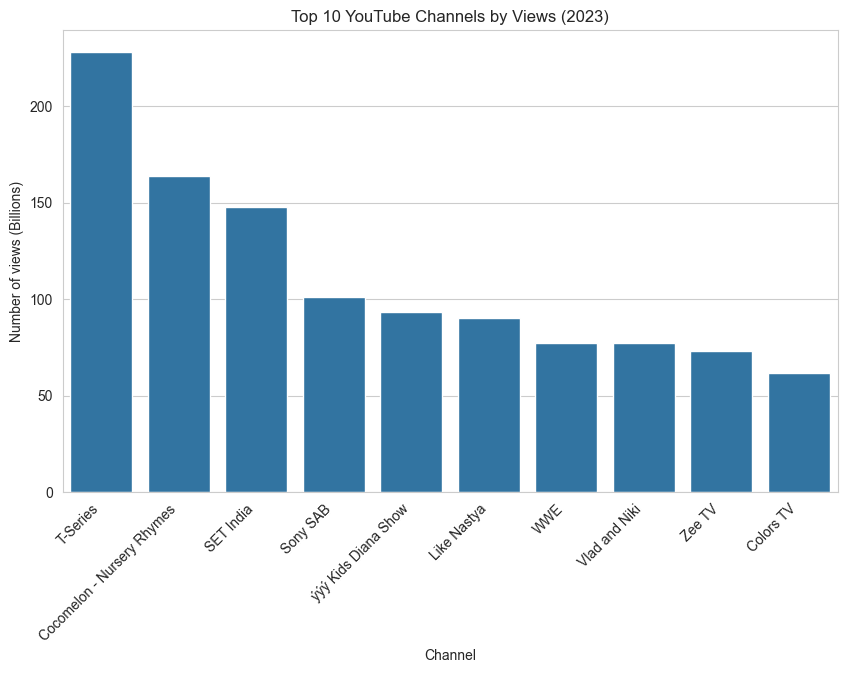

In [141]:
top10_views = df.sort_values('video views', ascending=False).head(10)
top10_views['video views'] = top10_views['video views'] / 10**9

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_views, x='Youtuber', y='video views')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by Views (2023)')
plt.xlabel('Channel')
plt.ylabel('Number of views (Billions)')
plt.show()

##### Highest viewed channels by categories

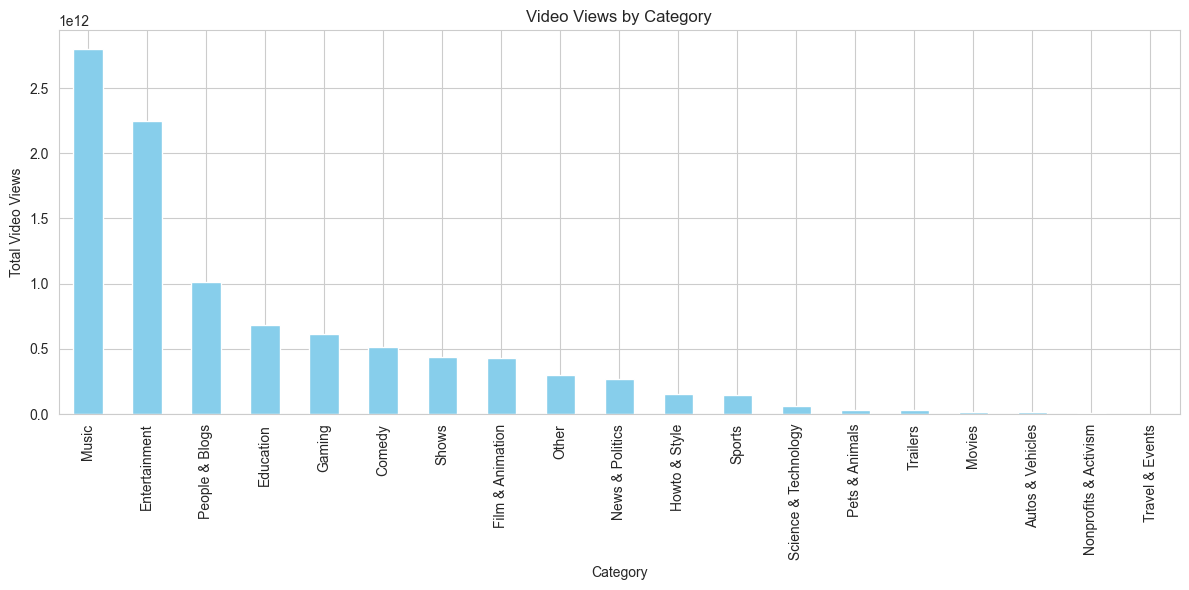

In [142]:
category_views = df.groupby('category')['video views'].sum().sort_values(ascending=False)

# bar plot
plt.figure(figsize=(12, 6))
category_views.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Video Views')
plt.title('Video Views by Category')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [143]:
df['uploads_to_subscriber_ratio'] = df['uploads'] / df['subscribers']

print(f"The average ratio of number of uploads to the number of subscriber is  {df['uploads_to_subscriber_ratio'].mean()}")



The average ratio of number of uploads to the number of subscriber is  0.000516909441395436


##### Top 10 YouTube Channels with Highest Uploads to Subscriber Ratio

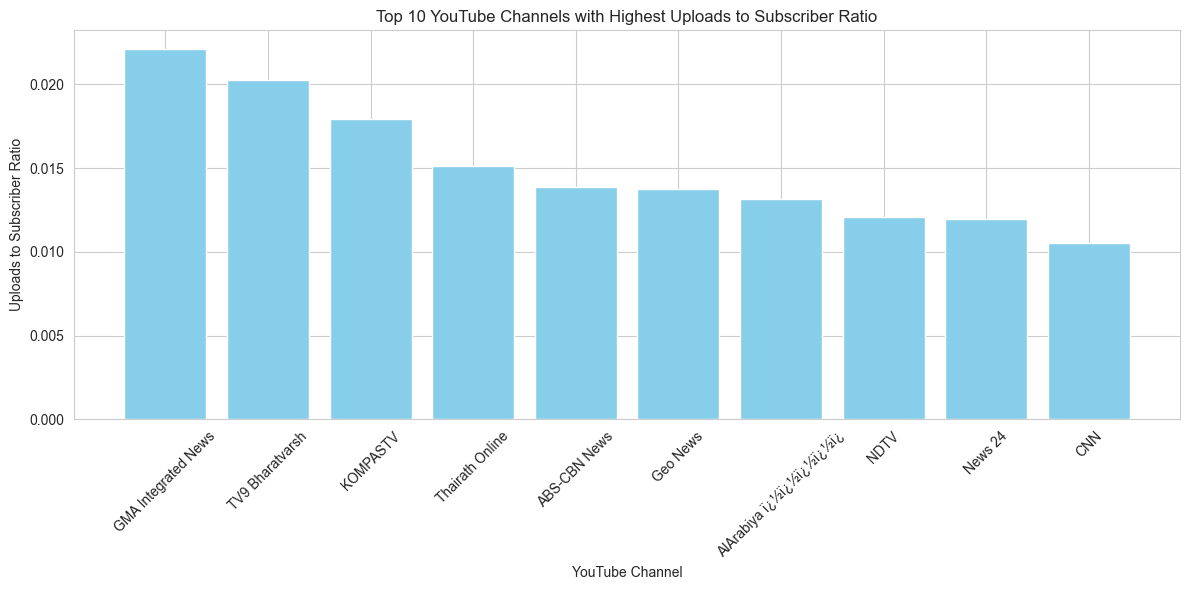

In [144]:
sorted_data = df.sort_values(by='uploads_to_subscriber_ratio', ascending=False)

top_10_data = sorted_data.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_data['Youtuber'], top_10_data['uploads_to_subscriber_ratio'], color='skyblue')
plt.xlabel('YouTube Channel')
plt.ylabel('Uploads to Subscriber Ratio')
plt.title('Top 10 YouTube Channels with Highest Uploads to Subscriber Ratio')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

Top 10 channels by monthly earnings

In [145]:
#Averaging the lowest and highest monthly earnings

df_earnings = df[['Youtuber']].copy()
df_earnings['mean_monthly_earnings'] = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean(axis=1) / 10**6
df_earnings

,Youtuber,mean_monthly_earnings
0,T-Series,4.782300e+00
1,YouTube Movies,2.500000e-08
2,MrBeast,2.868500e+00
3,Cocomelon - Nursery Rhymes,4.196900e+00
4,SET India,3.877950e+00
...,...,...
865,Natan por Aï¿,1.169050e+00
866,Free Fire India Official,1.375500e-01
867,Panda,1.425000e-04
868,RobTopGames,8.234000e-03


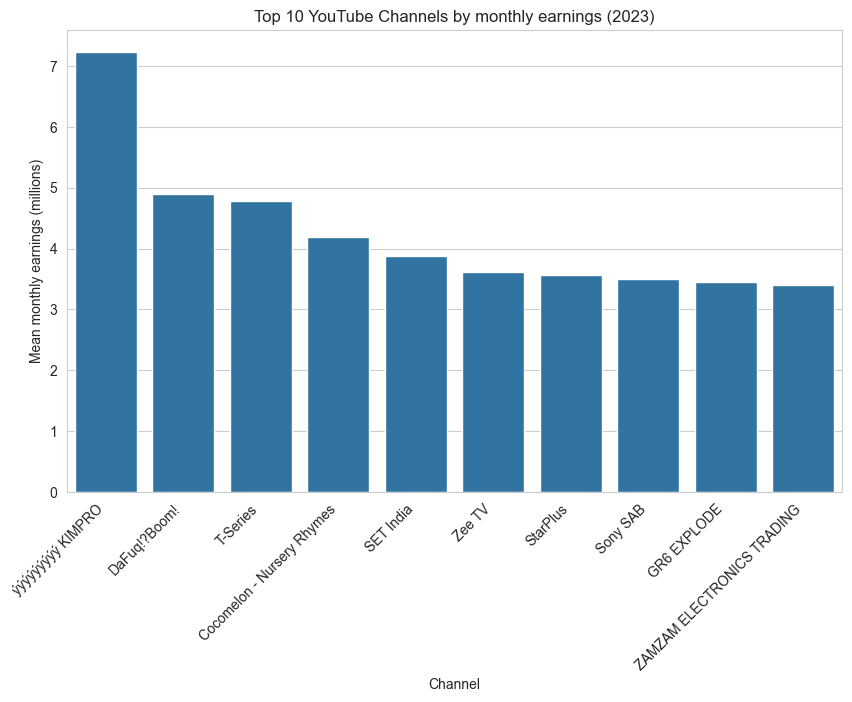

In [146]:
top10_earnings = df_earnings.sort_values('mean_monthly_earnings', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_earnings, x='Youtuber', y='mean_monthly_earnings')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by monthly earnings (2023)')
plt.xlabel('Channel')
plt.ylabel('Mean monthly earnings (millions)')
plt.show()

Highest Earning Categories

Text(0.5, 1.0, 'Highest Monthly Earnings by Category')

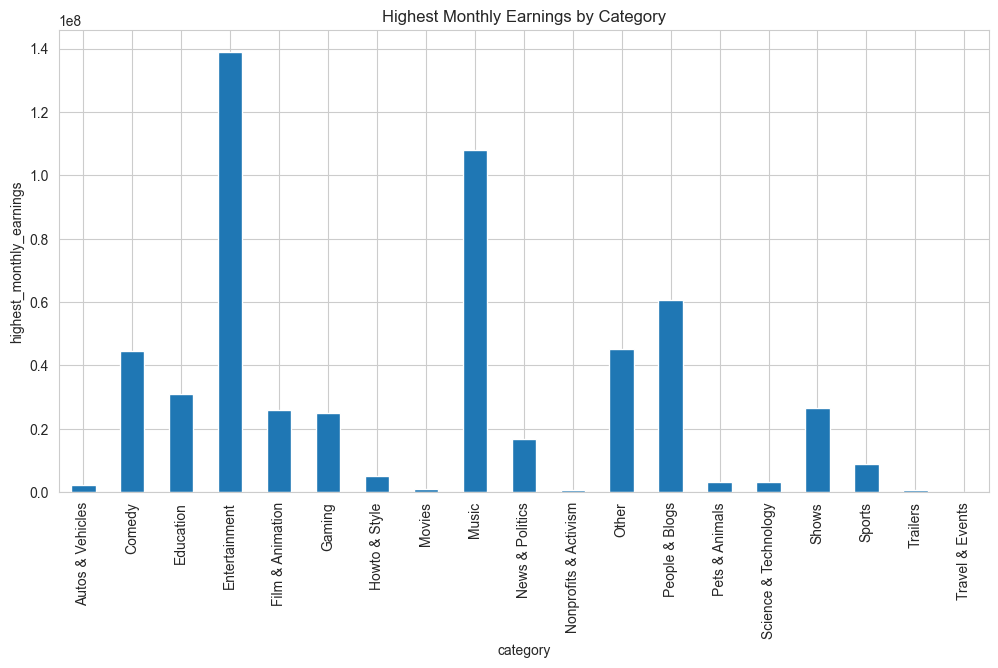

In [147]:
plt.figure(figsize=(12, 6))
highest_earning_category = df.groupby(['category'])['highest_monthly_earnings'].sum()
highest_earning_category.plot.bar()
plt.xlabel('category')
plt.ylabel('highest_monthly_earnings')
plt.title('Highest Monthly Earnings by Category')

Distribution of the channel creation year

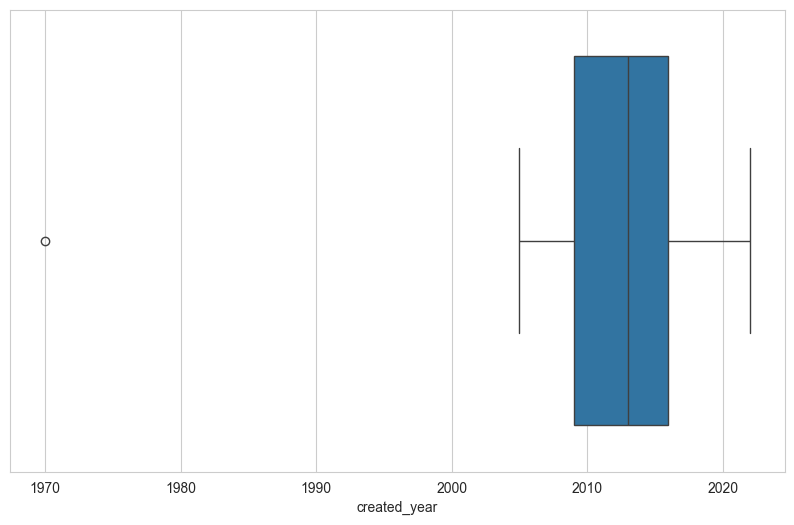

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='created_year')
plt.show()

The distribution shows almost all the channels were created between 2010 and 2020

It also shows that the one channel was created in 1970 which is incorrect and may have been mistake in the data

In [149]:
#Check the data that was created in 1970
df[df['created_year'] == 1970]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,uploads_to_subscriber_ratio
89,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,1970.0,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891,0.00002


The data is of Youtube official channel itself. So we are going to replace the created date with the original Youtube launch date which is December 15 2005

In [150]:
df.at[89, 'created_year'] = 2005
df.at[89, 'created_month'] = 'Dec'
df.at[89, 'created_date'] = 15

df.loc[[89]]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,uploads_to_subscriber_ratio
89,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,2005.0,Dec,15.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891,0.00002


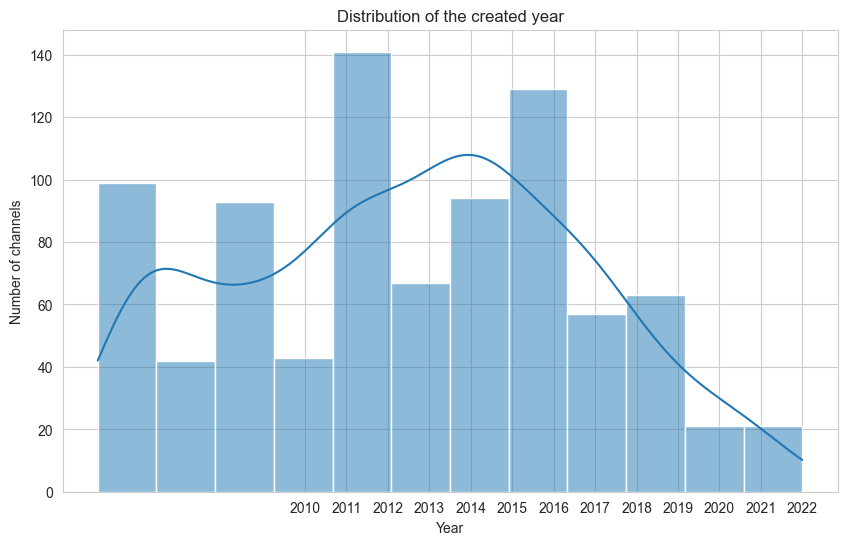

In [151]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='created_year', kde=True)
plt.xticks(range(2010, 2023))
plt.title('Distribution of the created year')
plt.xlabel('Year')
plt.ylabel('Number of channels')
plt.show()

##### Correlation of the dataset within the columns

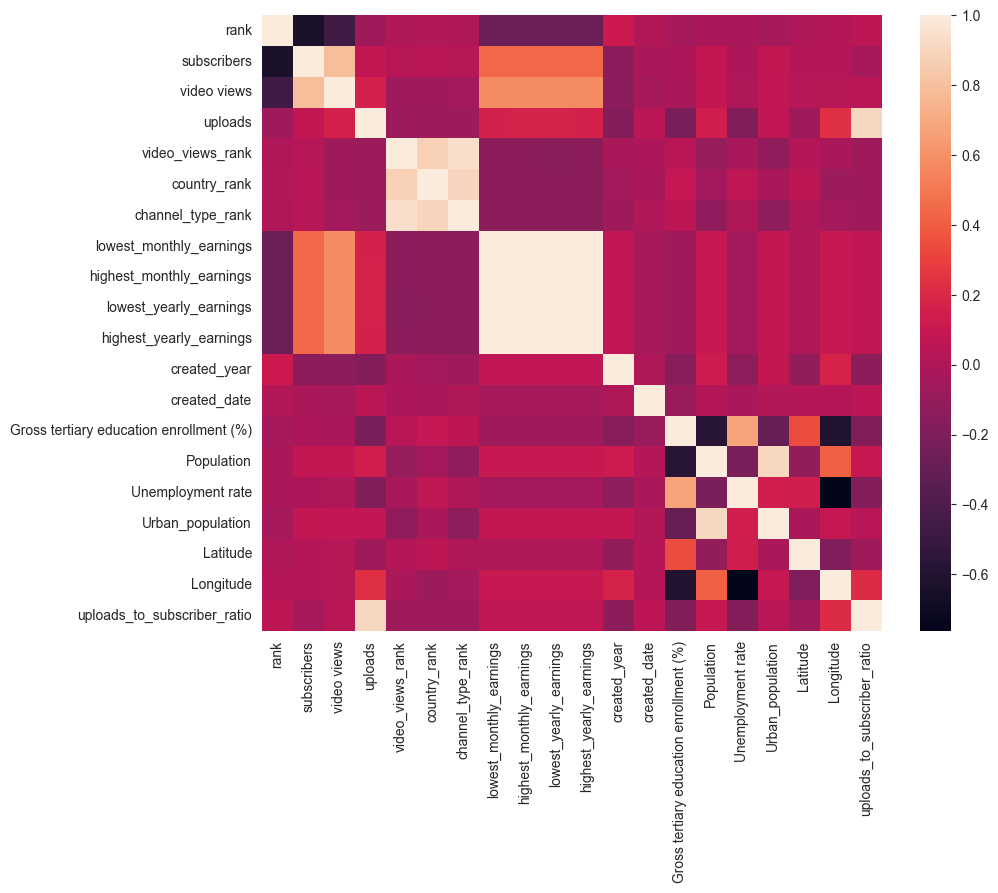

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

## predict

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime


from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [154]:
correlation = df.corr(numeric_only=True)

In [155]:
scope_video_views = correlation.loc[correlation['video views'].abs()>=0.1].index[:-1]
print(scope_video_views)

Index(['rank', 'subscribers', 'video views', 'uploads',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings'],
      dtype='object')


In [156]:
df_scope_video_views =df[scope_video_views]

In [157]:
df_scope_video_views

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,1,245000000,2.280000e+11,20082,564600.0,9000000.00,6800000.00,1.084000e+08
1,2,170000000,0.000000e+00,1,0.0,0.05,0.04,5.800000e-01
2,3,166000000,2.836884e+10,741,337000.0,5400000.00,4000000.00,6.470000e+07
3,4,162000000,1.640000e+11,966,493800.0,7900000.00,5900000.00,9.480000e+07
4,5,159000000,1.480000e+11,116536,455900.0,7300000.00,5500000.00,8.750000e+07
...,...,...,...,...,...,...,...,...
865,991,12300000,9.029610e+09,1200,138100.0,2200000.00,1700000.00,2.650000e+07
866,992,12300000,1.674410e+09,1500,16200.0,258900.00,194200.00,3.100000e+06
867,993,12300000,2.214684e+09,2452,17.0,268.00,201.00,3.200000e+03
868,994,12300000,3.741235e+08,39,968.0,15500.00,11600.00,1.858000e+05


In [158]:
df_scope_video_views = df_scope_video_views.drop(columns=['rank','lowest_monthly_earnings','highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings'])

In [159]:
df_scope_video_views

,subscribers,video views,uploads
0,245000000,2.280000e+11,20082
1,170000000,0.000000e+00,1
2,166000000,2.836884e+10,741
3,162000000,1.640000e+11,966
4,159000000,1.480000e+11,116536
...,...,...,...
865,12300000,9.029610e+09,1200
866,12300000,1.674410e+09,1500
867,12300000,2.214684e+09,2452
868,12300000,3.741235e+08,39


In [160]:
linear = LinearRegression()
random_forest = RandomForestRegressor()
dt = DecisionTreeRegressor()
algorithms = [linear, random_forest, dt]
algorithm_name = ['linear_regression', 'random forest', 'decision tree regressor']
kfold = KFold(n_splits= 10, shuffle= True)

In [161]:
categories_column = df.select_dtypes(include='object')

In [162]:
categories_column

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep
...,...,...,...,...,...,...,...
865,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb
866,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep
867,Panda,Other,HybridPanda,United Kingdom,GB,Games,Sep
868,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May


In [163]:
categories_column = categories_column.drop(columns=['Title','Abbreviation','created_month', 'Youtuber', 'category'])

In [164]:
df_scope_video_views_with_cat = pd.concat([df_scope_video_views,categories_column],axis=1)

In [165]:
df_scope_video_views_with_cat

,subscribers,video views,uploads,Country,channel_type
0,245000000,2.280000e+11,20082,India,Music
1,170000000,0.000000e+00,1,United States,Games
2,166000000,2.836884e+10,741,United States,Entertainment
3,162000000,1.640000e+11,966,United States,Education
4,159000000,1.480000e+11,116536,India,Entertainment
...,...,...,...,...,...
865,12300000,9.029610e+09,1200,Brazil,Entertainment
866,12300000,1.674410e+09,1500,India,Games
867,12300000,2.214684e+09,2452,United Kingdom,Games
868,12300000,3.741235e+08,39,Sweden,Games


In [166]:
y = df_scope_video_views_with_cat['video views']
X = df_scope_video_views_with_cat.drop(columns='video views')

In [168]:
# y

In [169]:
from sklearn.compose import ColumnTransformer # transform specific columns
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import scipy.stats as stats

In [170]:
X.dtypes

subscribers      int64
uploads          int64
Country         object
channel_type    object
dtype: object

In [171]:
X.isna().any()

subscribers     False
uploads         False
Country         False
channel_type    False
dtype: bool

Pipeline of rank

In [172]:
# stats.probplot(X['rank'], dist = 'norm', plot = plt)

In [173]:
# sns.kdeplot(X['rank'],fill = True)
# plt.title('Kde of rank')

In [174]:
# rank = Pipeline([('scaler_rank', StandardScaler())])

pipeline of subscribers

((array([-3.15722074e+00, -2.88887770e+00, -2.73892301e+00, -2.63305890e+00,
         -2.55040276e+00, -2.48219062e+00, -2.42388123e+00, -2.37280642e+00,
         -2.32726059e+00, -2.28608500e+00, -2.24845529e+00, -2.21376340e+00,
         -2.18154749e+00, -2.15144830e+00, -2.12318063e+00, -2.09651416e+00,
         -2.07126014e+00, -2.04726188e+00, -2.02438781e+00, -2.00252636e+00,
         -1.98158205e+00, -1.96147255e+00, -1.94212631e+00, -1.92348078e+00,
         -1.90548093e+00, -1.88807807e+00, -1.87122893e+00, -1.85489485e+00,
         -1.83904118e+00, -1.82363669e+00, -1.80865317e+00, -1.79406503e+00,
         -1.77984900e+00, -1.76598382e+00, -1.75245006e+00, -1.73922988e+00,
         -1.72630686e+00, -1.71366587e+00, -1.70129293e+00, -1.68917509e+00,
         -1.67730033e+00, -1.66565748e+00, -1.65423615e+00, -1.64302661e+00,
         -1.63201980e+00, -1.62120724e+00, -1.61058096e+00, -1.60013349e+00,
         -1.58985781e+00, -1.57974731e+00, -1.56979576e+00, -1.55999730e+00,

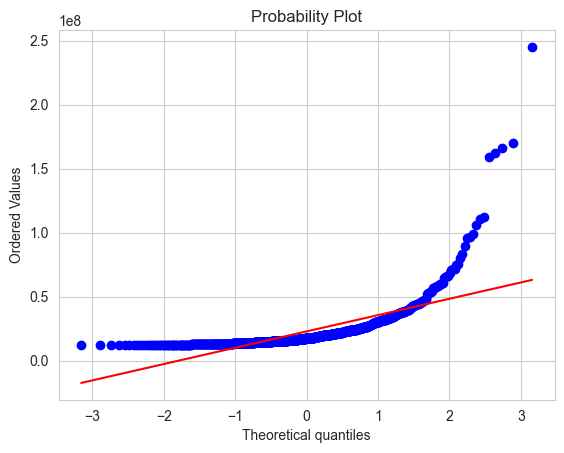

In [175]:
stats.probplot(X['subscribers'], dist = 'norm', plot = plt)

Text(0.5, 1.0, 'Kde of subscribers')

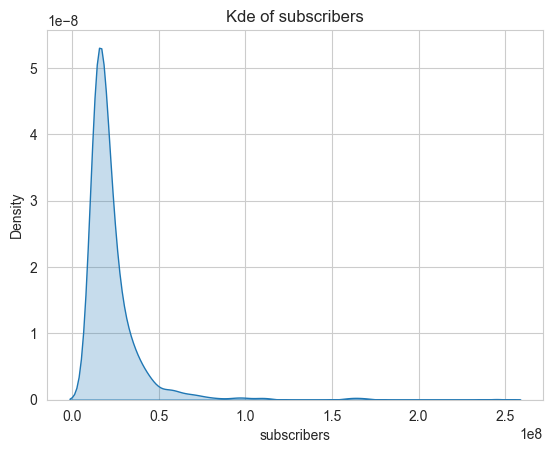

In [176]:
sns.kdeplot(X['subscribers'],fill = True)
plt.title('Kde of subscribers')

In [177]:
subscribers = Pipeline([('scaler_subscribers',MinMaxScaler())])

Pipeline of uploads

((array([-3.15722074e+00, -2.88887770e+00, -2.73892301e+00, -2.63305890e+00,
         -2.55040276e+00, -2.48219062e+00, -2.42388123e+00, -2.37280642e+00,
         -2.32726059e+00, -2.28608500e+00, -2.24845529e+00, -2.21376340e+00,
         -2.18154749e+00, -2.15144830e+00, -2.12318063e+00, -2.09651416e+00,
         -2.07126014e+00, -2.04726188e+00, -2.02438781e+00, -2.00252636e+00,
         -1.98158205e+00, -1.96147255e+00, -1.94212631e+00, -1.92348078e+00,
         -1.90548093e+00, -1.88807807e+00, -1.87122893e+00, -1.85489485e+00,
         -1.83904118e+00, -1.82363669e+00, -1.80865317e+00, -1.79406503e+00,
         -1.77984900e+00, -1.76598382e+00, -1.75245006e+00, -1.73922988e+00,
         -1.72630686e+00, -1.71366587e+00, -1.70129293e+00, -1.68917509e+00,
         -1.67730033e+00, -1.66565748e+00, -1.65423615e+00, -1.64302661e+00,
         -1.63201980e+00, -1.62120724e+00, -1.61058096e+00, -1.60013349e+00,
         -1.58985781e+00, -1.57974731e+00, -1.56979576e+00, -1.55999730e+00,

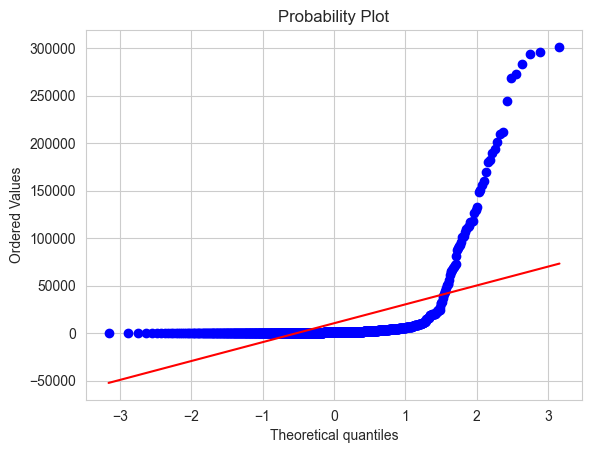

In [178]:
stats.probplot(X['uploads'], dist = 'norm', plot = plt)

Text(0.5, 1.0, 'Kde of uploads')

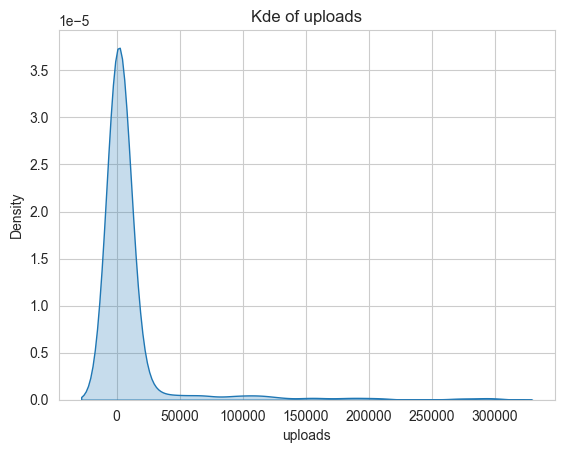

In [179]:
sns.kdeplot(X['uploads'],fill = True)
plt.title('Kde of uploads')

In [180]:
uploads = Pipeline([('scaler_uploads',MinMaxScaler())])

Pipeline of lowest_monthly_earnings

In [181]:
# stats.probplot(X['lowest_monthly_earnings'], dist = 'norm', plot = plt)

In [182]:
# sns.kdeplot(X['lowest_monthly_earnings'],fill = True)
# plt.title('Kde of lowest_monthly_earnings')

In [183]:
# lowest_monthly_earnings = Pipeline([('scaler_lowest_monthly_earnings',StandardScaler())])

Pipeline of highest_monthly_earnings

In [184]:
# stats.probplot(X['highest_monthly_earnings'], dist = 'norm', plot = plt)

In [185]:
# sns.kdeplot(X['highest_monthly_earnings'],fill = True)
# plt.title('Kde of highest_monthly_earnings')

In [186]:
# highest_monthly_earnings = Pipeline([('scaler_highest_monthly_earnings',StandardScaler())])

Pipeline of lowest_yearly_earnings

In [187]:
# stats.probplot(X['lowest_yearly_earnings'], dist = 'norm', plot = plt)

In [188]:
# sns.kdeplot(X['lowest_yearly_earnings'],fill = True)
# plt.title('Kde of lowest_yearly_earnings')

In [189]:
# lowest_yearly_earnings = Pipeline([('scaler_lowest_yearly_earnings',StandardScaler())])

Pipeline of highest_yearly_earnings

In [190]:
# stats.probplot(X['highest_yearly_earnings'], dist = 'norm', plot = plt)

In [191]:
# sns.kdeplot(X['highest_yearly_earnings'],fill = True)
# plt.title('Kde of highest_yearly_earnings')

In [192]:
# highest_yearly_earnings = Pipeline([('scaler_highest_yearly_earnings',StandardScaler())])

Pipeline of Youtuber

In [193]:
# Youtuber = Pipeline([('encoder_Youtuber', OneHotEncoder(sparse_output=False))])

In [194]:
category = Pipeline([('encoder_category', OneHotEncoder(sparse_output=False))])

In [195]:
Country = Pipeline([('encoder_Country', OneHotEncoder(sparse_output=False))])

In [196]:
channel_type = Pipeline([('encoder_channel_type', OneHotEncoder(sparse_output=False))])

In [197]:
X

,subscribers,uploads,Country,channel_type
0,245000000,20082,India,Music
1,170000000,1,United States,Games
2,166000000,741,United States,Entertainment
3,162000000,966,United States,Education
4,159000000,116536,India,Entertainment
...,...,...,...,...
865,12300000,1200,Brazil,Entertainment
866,12300000,1500,India,Games
867,12300000,2452,United Kingdom,Games
868,12300000,39,Sweden,Games


In [198]:
# stats.probplot(X['video views'], dist = 'norm', plot = plt)

In [199]:
# video_views = Pipeline([()])

In [200]:
preprocessor = ColumnTransformer(transformers=[
                                            #    ('rank',rank,['rank']),
                                               ('subscribers',subscribers,['subscribers']),
                                               ('uploads',uploads,['uploads']),
                                            #    ('lowest_monthly_earnings',lowest_monthly_earnings,['lowest_monthly_earnings']),
                                            #    ('highest_monthly_earnings',highest_monthly_earnings,['highest_monthly_earnings']),
                                            #    ('lowest_yearly_earnings',lowest_yearly_earnings,['lowest_yearly_earnings']),
                                            #    ('highest_yearly_earnings',highest_yearly_earnings,['highest_yearly_earnings']),
                                            #    ('Youtuber',Youtuber,['Youtuber']),
                                             #   ('category',category,['category']),
                                               ('Country',Country,['Country']),
                                               ('channel_type',channel_type,['channel_type'])],
                                remainder='passthrough')

In [201]:
pipeline = Pipeline([('preprocessor',preprocessor)])

In [202]:
X.shape

(870, 4)

In [252]:
X

,subscribers,uploads,Country,channel_type
0,245000000,20082,India,Music
1,170000000,1,United States,Games
2,166000000,741,United States,Entertainment
3,162000000,966,United States,Education
4,159000000,116536,India,Entertainment
...,...,...,...,...
865,12300000,1200,Brazil,Entertainment
866,12300000,1500,India,Games
867,12300000,2452,United Kingdom,Games
868,12300000,39,Sweden,Games


In [203]:
X_transformed = pipeline.fit_transform(X)

In [204]:
X_transformed.shape

(870, 66)

In [254]:
X_transformed[0]

array([1.        , 0.06664941, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,train_size=0.8)

In [207]:
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train,cv = kfold, scoring = 'neg_mean_squared_error')
    print(f"{algorithm_name[i]} - Score: {scores} - Mean Score{scores.mean()}")

linear_regression - Score: [-5.66800870e+42 -1.18168099e+20 -6.54335546e+42 -3.96780521e+43
 -4.99756980e+44 -6.37056931e+19 -1.03821709e+44 -2.04807859e+43
 -1.48734151e+44 -5.52665827e+19] - Mean Score-8.246830427085654e+43
random forest - Score: [-2.57933798e+19 -5.16025103e+19 -4.49897605e+19 -6.96762564e+19
 -2.69394437e+19 -2.86334392e+19 -4.73089400e+19 -3.21544877e+20
 -7.93377640e+19 -4.37634210e+19] - Mean Score-7.395897923315188e+19
decision tree regressor - Score: [-1.56618219e+20 -6.68603904e+19 -5.78806294e+19 -1.07394330e+20
 -7.52053538e+19 -3.48372045e+20 -1.01129350e+20 -4.32401710e+19
 -4.26408383e+19 -7.22616952e+19] - Mean Score-1.0716030216222727e+20


In [208]:
param_grid = {'max_depth' : [5,10,15],
              'n_estimators' : [5,6,7,8,9,10,11,12,13,15]}

In [209]:
grid = GridSearchCV(estimator=random_forest, param_grid=param_grid,cv = kfold, scoring='neg_mean_squared_error')

In [210]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             scoring='neg_mean_squared_error')

In [211]:
yhat = grid.predict(X_test)

In [212]:
grid.score(X_test,y_test)

-2.8780197212807578e+20

In [213]:
mean_squared_error(y_test, yhat)

2.8780197212807578e+20

In [214]:
grid2 = GridSearchCV(estimator=random_forest, param_grid=param_grid,cv = kfold)

In [255]:
X_train.shape

(696, 66)

In [215]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [216]:
grid2.score(X_test,y_test)

0.39026348382571174

In [217]:
yhat = grid2.predict(X_test)

In [218]:
mean_squared_error(y_test, yhat)

2.9342848902644475e+20

In [219]:
grid2.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [220]:
grid2.best_score_

0.44170176324311583

In [221]:
best_rf = RandomForestRegressor(max_depth=5, n_estimators=10)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [222]:
best_rf.score(X_test, y_test)

0.32721152724891756

In [223]:
import pickle
pickle.dump(best_rf, open('../models/rf_viewers_predictor', 'wb'))

In [224]:


# load the model from disk
loaded_model = pickle.load(open('rf_viewers_predictor', 'rb'))
rf_result = loaded_model.predict(X_test)

In [225]:
rf_result

array([4.44168342e+09, 1.05930033e+10, 2.33252839e+10, 3.51837774e+09,
       4.16364844e+09, 4.30516757e+09, 2.02415505e+10, 1.10049992e+10,
       7.25967608e+09, 2.57886236e+09, 8.15409353e+09, 7.84119906e+09,
       3.14716183e+09, 8.10665920e+09, 3.15603358e+09, 1.42191525e+10,
       5.43669055e+09, 3.59933110e+10, 9.36786812e+09, 4.09740448e+09,
       9.32650568e+09, 3.87651219e+09, 4.63886049e+09, 1.79855202e+10,
       7.79715912e+09, 6.71979156e+09, 6.10367217e+09, 1.71825006e+10,
       2.76494965e+09, 1.47140068e+10, 3.56681923e+09, 1.22391573e+10,
       3.73520541e+09, 1.83120022e+10, 1.63968941e+10, 5.79578878e+09,
       1.23081472e+10, 1.04335663e+10, 6.57926261e+09, 1.37083359e+10,
       1.38875937e+11, 1.80383979e+10, 2.82801863e+10, 1.95546267e+10,
       7.85413807e+09, 7.44919694e+09, 1.62792350e+10, 7.28718559e+09,
       8.93567374e+09, 6.65037301e+09, 2.28004242e+10, 1.07729588e+10,
       2.37598896e+10, 9.79299413e+09, 3.89876125e+09, 5.67840910e+09,
      

### For predicting monthly earnings

In [227]:
X_transformed

array([[1.00000000e+00, 6.66494086e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.77696605e-01, 3.31886309e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.60507091e-01, 2.45927755e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 8.13785230e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.29435661e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.05769512e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [229]:
df_scope_video_views_with_cat

,subscribers,video views,uploads,Country,channel_type
0,245000000,2.280000e+11,20082,India,Music
1,170000000,0.000000e+00,1,United States,Games
2,166000000,2.836884e+10,741,United States,Entertainment
3,162000000,1.640000e+11,966,United States,Education
4,159000000,1.480000e+11,116536,India,Entertainment
...,...,...,...,...,...
865,12300000,9.029610e+09,1200,Brazil,Entertainment
866,12300000,1.674410e+09,1500,India,Games
867,12300000,2.214684e+09,2452,United Kingdom,Games
868,12300000,3.741235e+08,39,Sweden,Games


In [234]:
y = df['highest_monthly_earnings']

In [235]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_transformed,y,train_size=0.8)

In [236]:
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train_2, y_train_2,cv = kfold, scoring = 'neg_mean_squared_error')
    print(f"{algorithm_name[i]} - Score: {scores} - Mean Score{scores.mean()}")

linear_regression - Score: [-3.53175305e+31 -1.20287266e+35 -1.16949763e+34 -1.22018649e+33
 -2.08427252e+37 -5.83367364e+34 -1.44995756e+12 -1.35554967e+36
 -7.80478837e+32 -4.34223091e+32] - Mean Score-2.2391064068316058e+36
random forest - Score: [-8.63979476e+11 -8.99112245e+11 -1.33714565e+12 -2.91865351e+12
 -2.87957733e+12 -1.17514320e+12 -4.62939386e+11 -4.62666655e+11
 -9.70315945e+11 -7.90971272e+11] - Mean Score-1276050467061.184
decision tree regressor - Score: [-4.45284200e+12 -1.71077219e+12 -2.04994131e+12 -3.48910184e+12
 -3.44094370e+12 -2.40001479e+12 -3.04603536e+12 -7.77601305e+11
 -7.84473569e+11 -1.63125729e+12] - Mean Score-2378298336587.084


In [243]:
linear_param = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_3 = GridSearchCV(estimator=linear, param_grid=linear_param,cv = kfold, scoring='neg_mean_squared_error')

In [244]:
grid_3.fit(X_train_2, y_train_2)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [245]:
grid_3.score(X_test_2, y_test_2)

-843985884628.093

In [250]:
# load the model from disk
loaded_model = pickle.load(open('../models/rf_viewers_predictor', 'rb'))
rf_result = loaded_model.predict(X_test)

In [300]:
countries = ['India', 'United States', 'Japan', 'Russia', 'South Korea',
           'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba',
           'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia',
           'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
           'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
           'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy',
           'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia',
           'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt',
           'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland',
           'Samoa']

# values = np.array(countries)
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# # print(integer_encoded)
# onehot_encoder = OneHotEncoder(sparse_output=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# # len(onehot_encoded[0])
# onehot_dict = {}
# for idx, ct in enumerate(countries):
#     onehot_dict[ct] = onehot_encoded[idx]

def calculate_onehot(data):
    values = np.array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_dict = {}
    for idx, ct in enumerate(data):
        onehot_dict[ct] = onehot_encoded[idx]
    return onehot_dict

channel_type = ['Music', 'Games', 'Entertainment', 'Education', 'People', 'Sports',
                'Film', 'News', 'Comedy', 'Howto', 'Nonprofit', 'Tech', 'Other',
                'Animals', 'Autos']

# calculate_onehot(channel_type)


# print(len(onehot_encoded[0])) 
# print(onehot_encoded)

In [307]:

numSub = 10000
numUpload = 200
country = 'India'
channelType = 'Music'
country_onehot_dict = calculate_onehot(countries)
country_onehot = list(country_onehot_dict[country])
print(type(country_onehot))
channel_onehot_dict = calculate_onehot(channel_type)
channel_onehot = list(channel_onehot_dict[channelType])
print(channel_onehot)
loaded_model.predict(np.array([100000, 200]+country_onehot+channel_onehot))

<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [269]:
lst = [[numSub, numUpload, country, channel_type]]


df = pd.DataFrame(lst, columns =['subscribers', 'uploads'])
df
# test_transformed = pipeline.fit_transform(df)

ValueError: 2 columns passed, passed data had 4 columns